In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

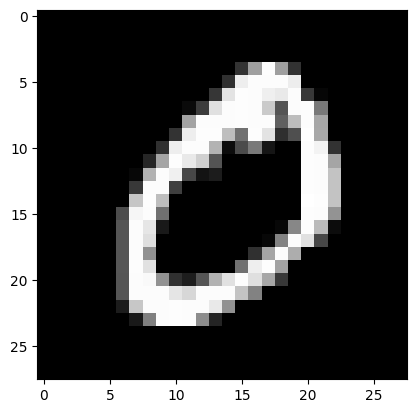

In [3]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [4]:
X_valid = X_train[:10000]
X_train = X_train[10000:]

In [5]:
print(len(X_train))
print(X_train[1].size)

50000
784


In [6]:
X_train = X_train.reshape(len(X_train), X_train[1].size)
X_valid = X_valid.reshape(len(X_valid), X_valid[1].size)
X_test = X_test.reshape(len(X_test), X_test[1].size)

In [7]:
print(X_train.shape)

(50000, 784)


In [8]:
from tensorflow.keras.models import Model

input_l=Input(shape=(784,))
encoding_1=Dense(256, activation='relu')(input_l)
encoding_2=Dense(128, activation='relu')(encoding_1)
bottleneck=Dense(32, activation='relu')(encoding_2)
decoding_1=Dense(128, activation='relu')(bottleneck)
decoding_2=Dense(256, activation='relu')(decoding_1)
output_l=Dense(784, activation='sigmoid')(decoding_2)
autoencoder=Model(inputs=[input_l],outputs=[output_l])
encoder=Model(inputs=[input_l],outputs=[bottleneck])
encoded_input=Input(shape=(32,))
decoded_layer_1=autoencoder.layers[-3](encoded_input)
decoded_layer_2=autoencoder.layers[-2](decoded_layer_1)
decoded=autoencoder.layers[-1](decoded_layer_2)
decoder=Model(inputs=[encoded_input],outputs=[decoded])


In [9]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

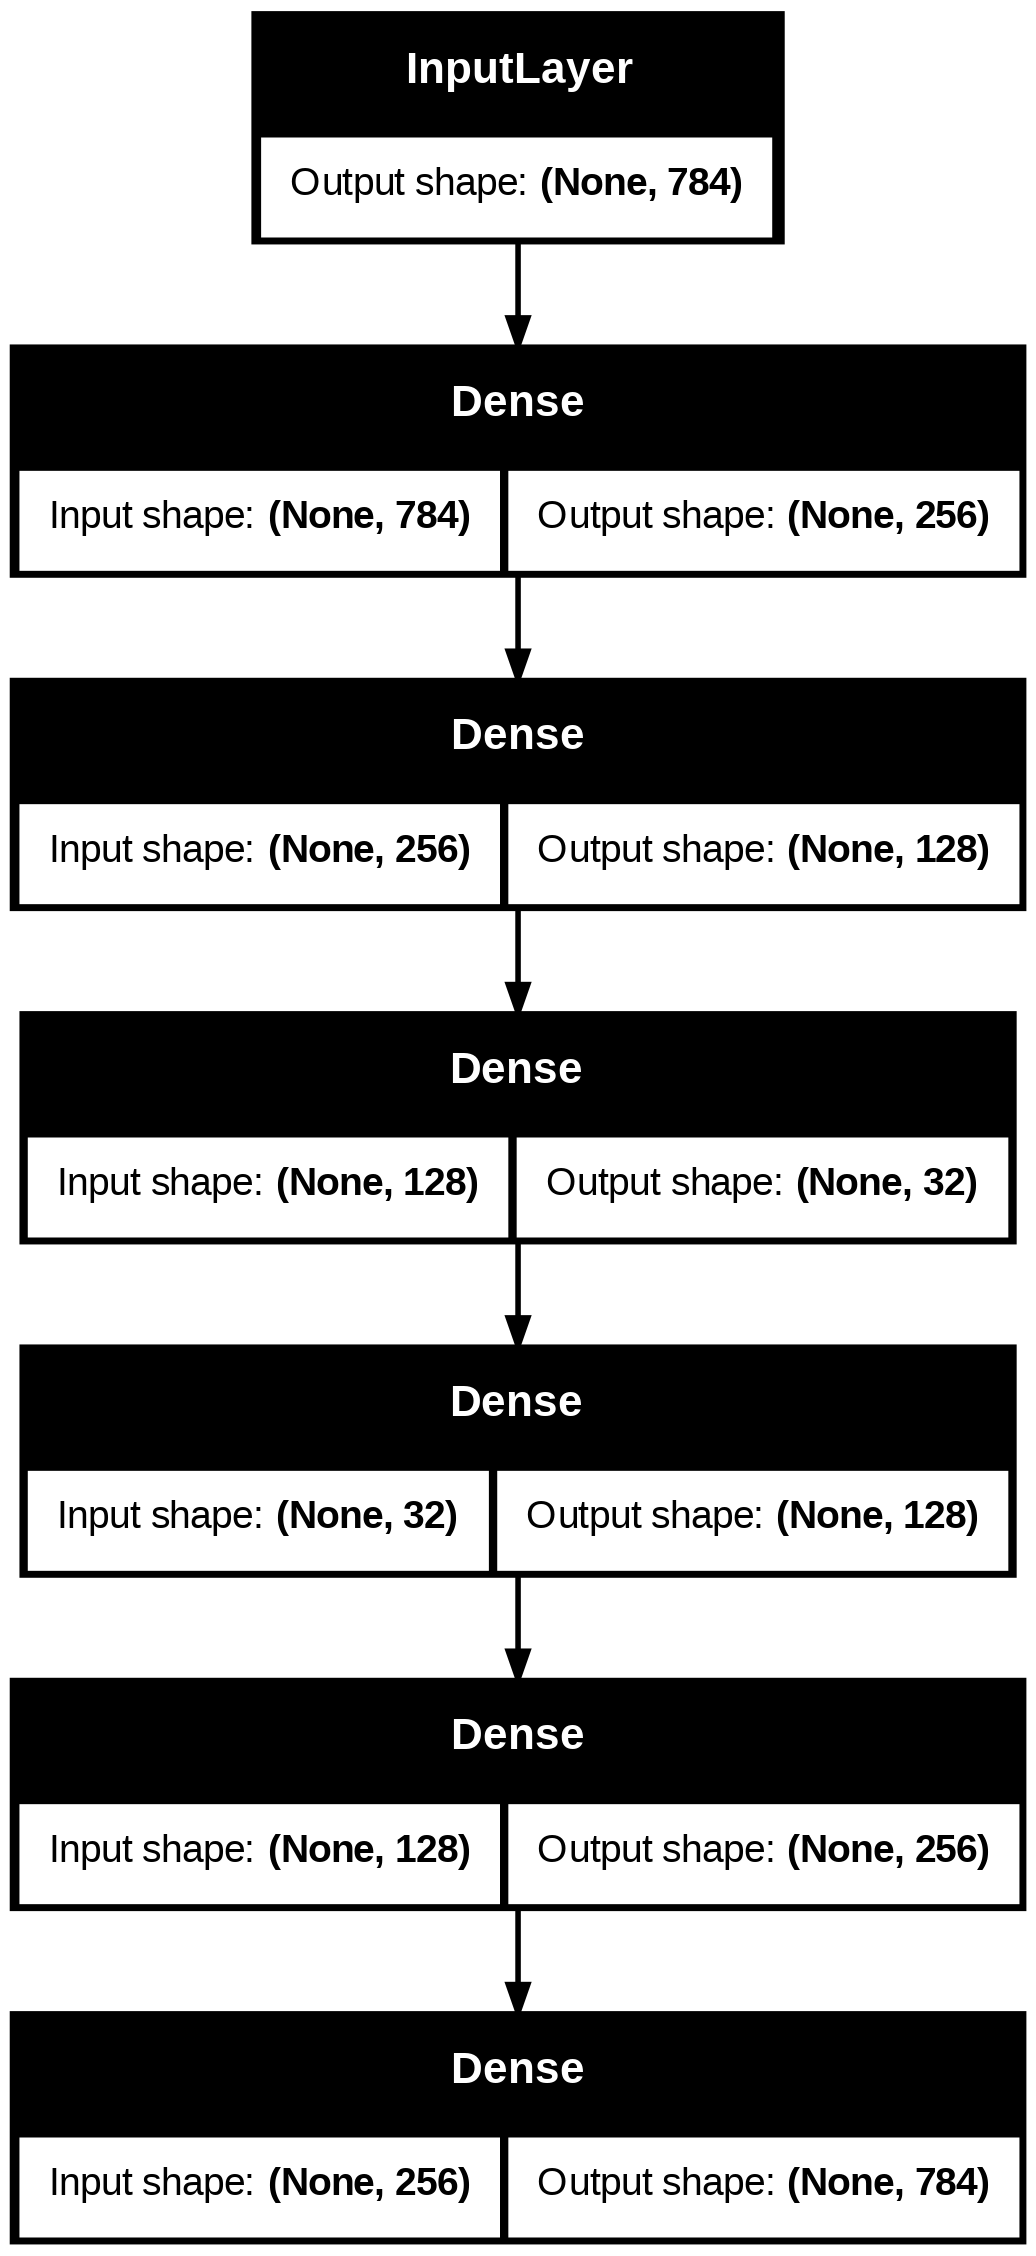

In [10]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.3191 - val_loss: 0.1513
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.1435 - val_loss: 0.1244
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.1224 - val_loss: 0.1130
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1123 - val_loss: 0.1056
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1052 - val_loss: 0.1013
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.1004 - val_loss: 0.0969
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0971 - val_loss: 0.0946
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0949 - val_loss: 0.0927
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0932 - val_loss: 0.0911
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0919 - val_loss: 0.0897
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0903 - val_loss: 0.0891
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━

In [13]:
loss = autoencoder.evaluate(X_test, X_test)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0792
0.07950352132320404


In [14]:
X_train[0:1].shape

(1, 784)

In [15]:
y_proba = autoencoder.predict(X_test[0:1])
print(y_proba.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
(1, 784)


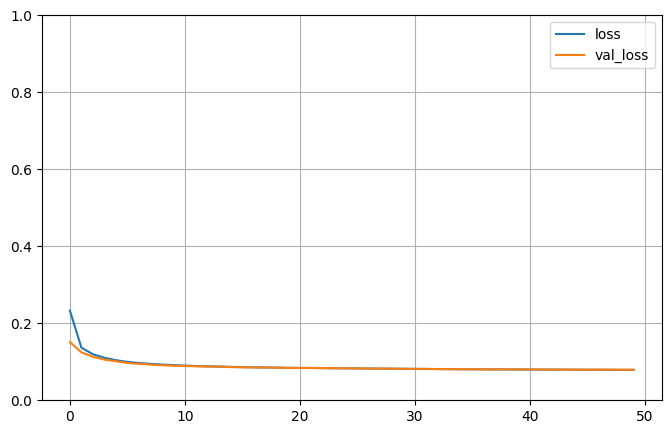

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

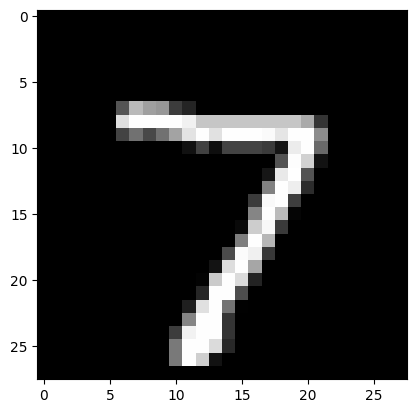

In [17]:
plt.imshow(X_test[0:1].reshape(28,28), cmap='gray')
plt.show()

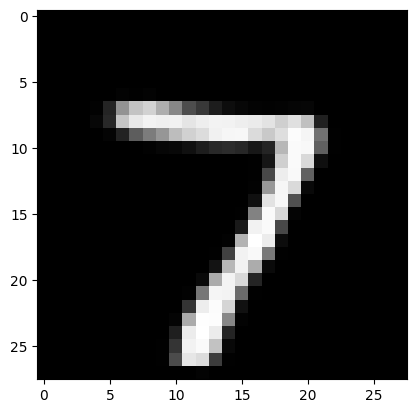

In [18]:
plt.imshow(y_proba.reshape(28,28), cmap='gray')
plt.show()
#

In [21]:
from sklearn.metrics import *
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [784, 1]

In [23]:
print_stats(y_proba.flatten(), X_test[0:1].flatten())

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [25]:
X_test[0:1] - y_proba

array([[-1.02862011e-10, -1.47234003e-10, -2.96632319e-09,
        -5.18707334e-11, -5.78709615e-11, -1.59594629e-10,
        -3.96551958e-10, -1.39728437e-10, -5.68652292e-10,
        -7.80363881e-12, -1.26253907e-09, -5.63119169e-11,
        -6.01857268e-13, -1.46925682e-18, -4.58037150e-19,
        -5.69694574e-13, -9.41907594e-11, -3.87893398e-11,
        -2.19680957e-12, -1.22594088e-11, -1.68268199e-09,
        -1.69032677e-10, -3.84023473e-11, -7.29019622e-11,
        -1.80819715e-09, -2.69698482e-11, -4.38828252e-10,
        -1.03657485e-10, -2.90617558e-10, -9.46252191e-12,
        -3.03476619e-11, -1.31075359e-10, -9.16019241e-14,
        -9.79842428e-14, -2.79011996e-15, -3.27500715e-14,
        -8.96176444e-14, -5.00938104e-13, -4.99520422e-16,
        -1.94650236e-16, -3.61770470e-21, -7.17027073e-24,
        -7.73417819e-25, -4.56234707e-23, -3.07871358e-22,
        -9.74592663e-20, -7.93210224e-17, -3.44027648e-19,
        -2.43362818e-19, -4.58148401e-21, -6.15587657e-1

In [26]:
x = y_proba - X_test[0:1]
print(x.shape)

(1, 784)
